## Scipy PWM sin modulation

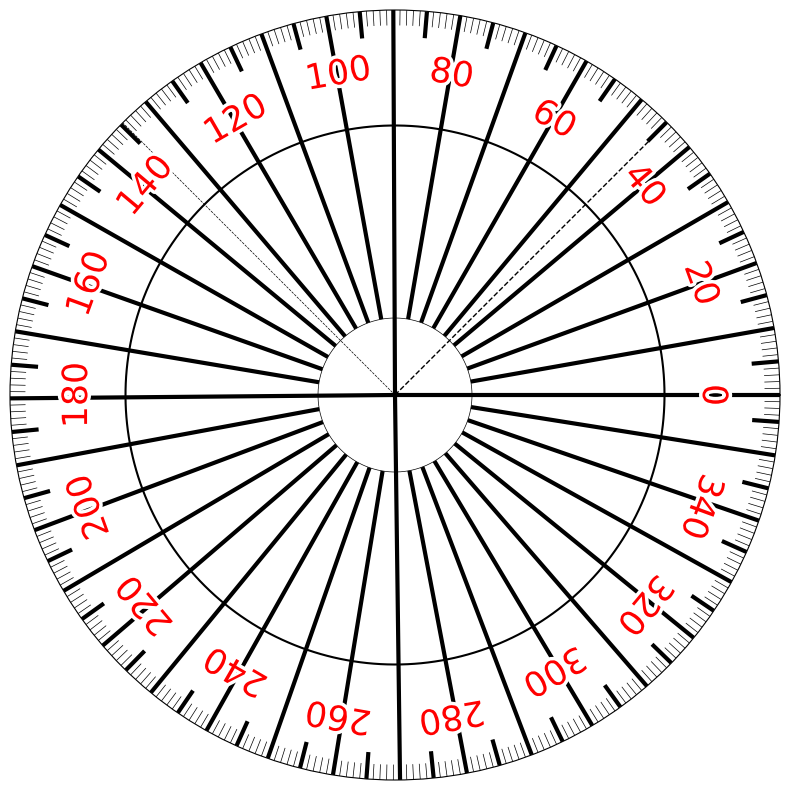

In [9]:
import matplotlib.pyplot as plt
from matplotlib.patheffects import withStroke
from matplotlib.collections import LineCollection
import numpy as np

# fig = plt.figure(
#     ncols=1,
#     # sharey=True,
#     # figsize=(6, 2),
#     figsize=(8, 8),
#     # gridspec_kw=dict(width_ratios=[1, 3], wspace=0),
# )
# ax = plt.subplot(projection='polar')

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='polar')
theta_min=0
theta_max=360
r_min=0
r_max=10
ax.set_thetamin(theta_min)
ax.set_thetamax(theta_max)
ax.set_rlim(r_min, r_max)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.grid(False)
scale = np.zeros((theta_max, 2, 2))
scale[:, 0, 0] = np.linspace(0, 2*np.pi, theta_max)  # 刻度线的角度值
scale[:, 0, 1] = 9.6  # 每度的刻度线起始点r值
scale[::5, 0, 1] = 9.3  # 每5度的刻度线起始点r值
scale[::10, 0, 1] = 2  # 每10度的刻度线起始点r值
scale[::90, 0, 1] = 0  # 90度的刻度线起始点r值
scale[:, 1, 0] = np.linspace(0, 2*np.pi, theta_max)
scale[:, 1, 1] = 10

line_segments = LineCollection(scale, linewidths=[3, 0.5, 0.5, 0.5, 0.5],
                               color='k', linestyle='solid')
ax.add_collection(line_segments)
c = np.linspace(0, 2*np.pi, 500)
ax.plot(c, [7]*c.size, color='k', linewidth=1.5)
ax.plot(c, [2]*c.size, color='k', linewidth=0.5)

ax.plot([0, np.deg2rad(45)], [0, 10],
        color='k', linestyle='--', linewidth=1)
ax.plot([0, np.deg2rad(135)], [0, 10],
        color='k', linestyle='--', linewidth=0.5)

text_kw = dict(rotation_mode='anchor',
               va='top', ha='center', color='red', clip_on=False,
               path_effects=[withStroke(linewidth=5, foreground='white')])

for i in range(0, theta_max, 20):
    theta = np.deg2rad(i)
    if theta in [0,np.pi/3,2*np.pi/3,3*np.pi/3,4*np.pi/3,5*np.pi/3]:
        ax.text(theta, 8.7, i,rotation=i-90, fontsize=25, **text_kw)
        continue
    ax.text(theta, 8.9, i, rotation=i-90, fontsize=25, **text_kw)
    # ax.text(theta, 7.9, 180-i, rotation=i-90, fontsize=12, **text_kw)


plt.show()

## PWM modulation on Sin

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
# plt.ion()

In [5]:
###############   Create data  ########################
t = np.linspace(0, 1, 2000) 
sig = np.sin(2 * np.pi * t)
pwm = signal.square(2 * np.pi * 30 * t, duty=(sig + 1)/2)
pwm15 = signal.square(2 * np.pi * 30 * t, 0.15)
effectiveV15 = pwm15*0+0.15*5 
pwm85 = signal.square(2 * np.pi * 30 * t, 0.85)
effectiveV85 = pwm15*0+0.85*5

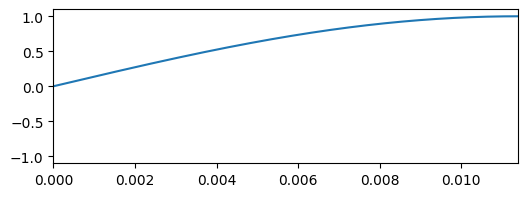

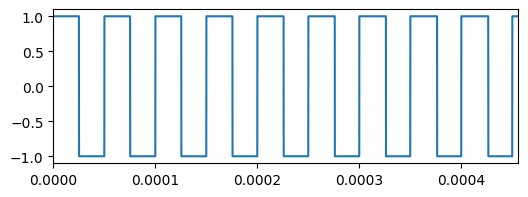

In [43]:

Time_Step=1/40e6#MCU run time step 40MHz #1/2e4
Time_Start=0
Time_Stop=1
t=np.arange(Time_Start,Time_Stop,Time_Step)

#Sin wave Drive Frequency
Sin_T=4*11.4e-3
Sin_Freq=1/Sin_T #1Hz
omega=2*np.pi*Sin_Freq
Sin_Signal=np.sin(omega*t)

PWM_Freq=20e3#2e4#30Hz
PWM_Duty=(Sin_Signal+1)/2
PWM_Omega=2*np.pi*PWM_Freq
PWM_Signal=signal.square(PWM_Omega*t,PWM_Duty)


plt.figure(figsize=(6, 2))
plt.plot(t,Sin_Signal)
# plt.grid()
plt.xlim(0,1/4*Sin_T)
plt.show()

plt.figure(figsize=(6, 2))
plt.plot(t,PWM_Signal)
# plt.grid()
plt.xlim(0,1/100*Sin_T)
plt.show()

BAT_Voltage=12
Mosfet_Out=BAT_Voltage*PWM_Signal

R_L=30#30R
L_L=20e-3#20mH

R_C=19.4 #19.4R
L_C=12.4e-3 #12.4mH

R=R_L
L=L_L




In [52]:

tout, yout, xout = signal.lsim((b, a), U=PWM_Signal, T=t)

5e-05

In [ ]:
xlim_Start  =0
xlim_Periode=100e-5
xlim_Stop   =  xlim_Start  +   xlim_Periode
plt.plot(tout,xout)
plt.xlim(xlim_Start,xlim_Stop)
plt.show()
plt.plot(tout,yout)
plt.xlim(xlim_Start,xlim_Stop)
plt.show()

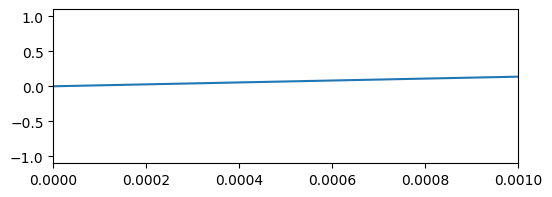

In [54]:
plt.figure(figsize=(6, 2))
plt.plot(t,Sin_Signal)
# plt.grid()
xlim_Start  =0
xlim_Periode=100e-5
xlim_Stop   =  xlim_Start  +   xlim_Periode
plt.xlim(xlim_Start,xlim_Stop)
plt.show()


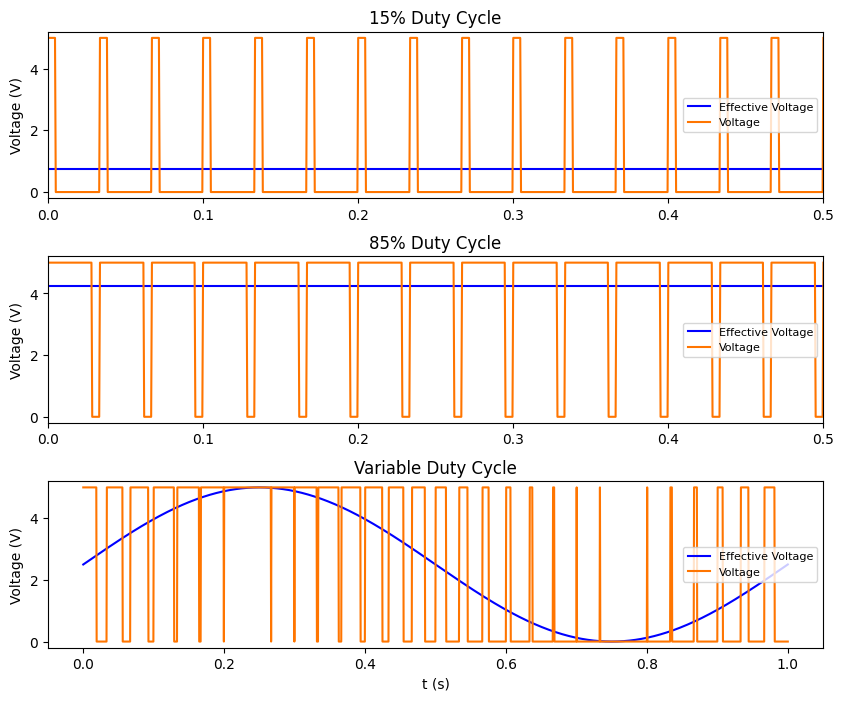

In [6]:
plt.figure(figsize=(10, 8))
plt.subplot(3, 1, 1)
plt.plot(t, effectiveV15,'b',label = 'Effective Voltage')
plt.plot(t, pwm15*2.5+2.5,c=(255/255.,117/255.,0/255.),label = 'Voltage')
plt.ylim(-0.2, 5.2)
plt.xlim(0, 0.5)
plt.title('15% Duty Cycle')
plt.ylabel('Voltage (V)')
plt.legend(loc = 'best',prop={ 'size': 8})

plt.subplot(3, 1, 2)
plt.plot(t, effectiveV85,'b',label = 'Effective Voltage')
plt.plot(t, pwm85*2.5+2.5,c=(255/255.,117/255.,0/255.),label = 'Voltage')
plt.ylim(-0.2, 5.2)
plt.xlim(0, 0.5)
plt.title('85% Duty Cycle')
plt.ylabel('Voltage (V)')
plt.legend(loc = 'best',prop={ 'size': 8})

plt.subplot(3, 1, 3)
plt.plot(t, sig*2.5+2.5, 'b',label = 'Effective Voltage')
plt.plot(t, pwm*2.5+2.5, c=(255/255.,117/255.,0/255.),label = 'Voltage')
plt.ylim(-0.2, 5.2)
plt.xlabel('t (s)')
plt.ylabel('Voltage (V)')
plt.title('Variable Duty Cycle')
plt.legend(loc = 'best',prop={ 'size': 8})
plt.subplots_adjust(hspace=0.35)
# plt.savefig('PWM.svg')